In [1]:
pip install numpy scikit-fuzzy pandas scikit-learn

     ------------------------------------ 994.0/994.0 kB 381.4 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894075 sha256=ff4c59abe9d19fe1c17b215f010ac1c3ad8245900103f5213b47be5ba560e28d
  Stored in directory: c:\users\palla\appdata\local\pip\cache\wheels\32\2c\a1\a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import skfuzzy as fuzz
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv("data_set.csv")

In [3]:
data_for_clustering = data.iloc[:1000, 1:] 

In [4]:
data = data.iloc[:1000, 1:] 

In [5]:
data_for_clustering = data_for_clustering.select_dtypes(include=[np.number])

In [6]:
data_for_clustering

,T_image,T_video,T_read,T_audio,T_hierarchies,T_powerpoint,T_abstract,T_concrete,T_result,N_standard_questions_correct,...,T_reading_in_forum,T_solve_excercise,T_submit_assignment,N_group_discussions,T_outlines,Skipped_los,N_next_button_used,T_spent_in_session,N_questions_on_detials,N_questions_on_outlines
0,8.5,8.5,7.5,8.0,3.0,3.5,2.5,7.5,6.5,26.0,...,4.5,7.0,4.5,7.5,14.0,0.5,240.0,19.0,131.0,78.5
1,9.5,10.5,10.5,10.0,2.5,3.0,4.0,3.5,4.5,58.5,...,6.5,9.0,2.5,9.0,9.5,6.5,223.0,23.0,54.0,62.5
2,7.5,10.0,9.5,8.5,5.5,6.0,5.5,5.5,4.5,20.0,...,7.0,11.5,4.0,10.0,11.5,7.5,179.0,24.0,111.0,138.0
3,9.5,8.0,8.0,8.5,3.5,3.0,2.5,4.0,6.0,24.0,...,7.5,8.0,2.5,7.5,7.0,5.5,152.0,24.5,32.5,107.5
4,7.0,11.0,9.5,8.0,6.5,5.5,2.5,5.0,7.0,38.5,...,6.5,8.5,4.0,8.5,11.0,3.0,129.5,21.0,138.0,108.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,6.5,8.5,10.0,8.5,3.0,2.5,2.0,4.0,7.5,32.5,...,6.5,9.5,3.0,12.0,13.0,7.0,121.5,21.5,92.0,81.5
996,9.5,14.5,12.0,8.5,4.0,6.5,2.5,5.5,7.0,74.0,...,6.0,11.5,2.0,11.5,14.0,10.5,86.0,21.0,72.0,59.0
997,6.5,12.5,10.0,6.5,4.0,4.5,2.0,2.5,7.0,89.5,...,6.0,6.0,4.5,11.5,10.5,11.5,111.5,20.0,69.0,73.5
998,8.5,8.0,5.0,9.5,6.5,4.0,5.5,8.0,7.0,73.0,...,5.0,6.0,3.5,12.5,6.0,11.5,237.5,17.0,93.5,111.5


In [7]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_for_clustering)

In [8]:
data_transposed = data_scaled.T

In [9]:
n_clusters = 8

In [10]:
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(data_transposed, c=n_clusters, m=5, error=0.005, maxiter=1000, init=None)

In [13]:
cluster_membership = np.argmax(u, axis=0)

In [14]:
cluster_membership 

array([5, 1, 0, 5, 6, 1, 7, 1, 2, 6, 1, 0, 5, 6, 7, 1, 0, 7, 1, 0, 5, 1,
       0, 5, 1, 0, 3, 1, 0, 6, 6, 7, 7, 6, 6, 0, 3, 1, 3, 4, 4, 5, 4, 7,
       0, 5, 5, 2, 1, 1, 0, 1, 0, 0, 5, 5, 4, 2, 7, 4, 2, 6, 6, 2, 0, 0,
       7, 5, 5, 5, 1, 0, 0, 1, 0, 1, 7, 7, 5, 4, 5, 7, 1, 4, 2, 7, 4, 2,
       7, 6, 1, 1, 0, 7, 5, 7, 7, 4, 2, 6, 6, 6, 6, 5, 5, 0, 5, 7, 4, 1,
       7, 1, 6, 6, 7, 2, 1, 1, 0, 4, 1, 2, 7, 5, 6, 0, 0, 5, 6, 5, 3, 1,
       0, 5, 1, 2, 5, 4, 0, 1, 5, 5, 5, 4, 7, 5, 2, 1, 5, 0, 7, 0, 1, 5,
       7, 7, 4, 0, 1, 6, 6, 1, 5, 2, 2, 7, 7, 1, 4, 0, 4, 1, 1, 7, 5, 7,
       2, 5, 5, 4, 5, 3, 1, 4, 1, 0, 6, 1, 7, 7, 7, 3, 5, 6, 1, 7, 0, 1,
       6, 5, 7, 4, 2, 1, 3, 2, 4, 0, 5, 1, 6, 0, 0, 1, 6, 2, 0, 5, 4, 4,
       7, 7, 7, 1, 0, 7, 0, 0, 1, 0, 5, 0, 6, 4, 6, 6, 0, 1, 4, 4, 0, 4,
       1, 0, 6, 7, 0, 2, 2, 1, 6, 1, 1, 4, 4, 6, 1, 6, 2, 6, 7, 4, 7, 6,
       0, 5, 6, 1, 0, 0, 0, 0, 2, 4, 1, 7, 6, 1, 0, 6, 4, 0, 2, 1, 6, 1,
       4, 5, 1, 0, 0, 5, 4, 6, 1, 1, 5, 1, 2, 0, 1,

In [17]:
data['Cluster'] = cluster_membership

In [18]:
print("Cluster Centers:")
print(cntr)

Cluster Centers:
[[0.49994813 0.49827238 0.51116699 0.49377285 0.49842682 0.49475801
  0.48633917 0.50549276 0.49999294 0.50603572 0.50974836 0.50112565
  0.50262826 0.49887075 0.49671791 0.50501764 0.5135485  0.50584787
  0.49864163 0.51644048 0.50649149 0.49277134 0.50236474]
 [0.50000775 0.49839812 0.51111375 0.49370056 0.49838849 0.49472552
  0.48623912 0.50552653 0.49990144 0.50605971 0.50980204 0.50111814
  0.50260797 0.49886525 0.49677673 0.50502945 0.51337538 0.50587468
  0.49875881 0.51642129 0.50652092 0.49276522 0.50230721]
 [0.50003923 0.49831584 0.51110137 0.49369876 0.498381   0.4946844
  0.48627746 0.50548227 0.4999999  0.50607255 0.50974426 0.50117461
  0.50262232 0.49891015 0.49681191 0.50502058 0.51340329 0.50576715
  0.49862219 0.51646124 0.50649533 0.49277084 0.50230493]
 [0.50001188 0.49828847 0.51113727 0.49367483 0.4984117  0.49469857
  0.48622845 0.50548715 0.49998656 0.50602406 0.50975378 0.50113689
  0.50262942 0.49890347 0.49676394 0.50501148 0.51343028 0.505

In [16]:
print("Membership Matrix:")
print(u)

Membership Matrix:
[[0.12500296 0.12499573 0.124999   ... 0.12500059 0.12499938 0.12500155]
 [0.12499791 0.12500074 0.12500029 ... 0.12499882 0.12500163 0.12499825]
 [0.12500301 0.12499999 0.12499884 ... 0.12499888 0.1250013  0.12500075]
 ...
 [0.12499634 0.12500299 0.12499858 ... 0.12500307 0.12500055 0.12499884]
 [0.12499818 0.12500157 0.12500259 ... 0.12499726 0.12499818 0.12499936]
 [0.12499827 0.12500058 0.12499967 ... 0.12499911 0.12499864 0.12500015]]


In [17]:
print("Cluster Membership for Each Data Point:")
print(cluster_membership)

Cluster Membership for Each Data Point:
[2 5 6 2 2 7 0 3 2 3 2 5 0 3 5 4 5 3 5 1 1 0 6 2 2 0 2 5 2 0 1 2 3 0 3 6 2
 0 5 0 0 0 2 3 3 4 4 0 2 3 6 2 3 0 5 0 2 3 1 1 5 5 3 6 1 2 4 2 2 2 4 5 0 3
 0 7 7 5 2 0 5 3 3 3 6 2 1 2 7 0 4 7 3 3 5 1 5 5 2 7 2 2 3 5 5 2 2 2 0 4 3
 5 2 0 5 3 1 5 1 5 0 5 4 0 3 3 0 4 2 7 7 7 0 0 5 5 0 2 2 4 4 2 0 4 0 2 5 3
 0 0 3 0 5 5 0 1 1 2 0 7 4 0 2 5 5 5 1 3 3 3 3 3 3 3 0 3 2 2 1 4 0 2 3 5 5
 0 3 6 5 3 5 2 0 0 3 3 5 3 4 6 5 1 5 6 5 2 2 2 0 6 2 0 3 3 3 3 3 5 5 3 3 3
 6 5 5 5 1 0 3 5 5 0 0 7 6 2 3 7 2 5 4 1 5 0 0 1 6 5 6 0 3 7 3 0 0 5 1 1 3
 3 3 5 0 0 3 5 3 7 3 0 5 0 5 1 2 5 5 5 0 5 3 2 2 6 2 7 3 2 2 3 5 5 5 6 5 1
 4 3 5 0 6 1 1 4 0 0 3 2 0 2 2 5 2 3 4 3 5 5 0 0 2 5 3 1 6 6 2 7 4 3 3 5 4
 3 3 5 2 3 2 3 3 3 3 6 6 3 0 6 3 0 4 5 2 2 4 4 2 2 7 5 5 0 2 0 4 3 0 2 1 2
 7 2 3 4 3 6 2 5 3 5 2 3 3 5 5 0 0 3 3 2 4 3 5 2 3 3 7 0 6 3 7 2 5 3 0 0 2
 3 1 4 2 7 3 5 1 0 5 1 3 0 5 4 1 2 1 0 7 5 7 3 0 0 0 3 3 7 3 3 6 0 3 7 2 5
 2 5 2 5 3 3 4 7 4 2 2 7 3 0 1 3 3 5 0 5 0 1 6 2 5 1 4 5 0 2

In [18]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [19]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_transposed.T)

In [20]:
clustered_data = pd.DataFrame(data_pca, columns=['PC1', 'PC2'])
clustered_data['Cluster'] = cluster_membership

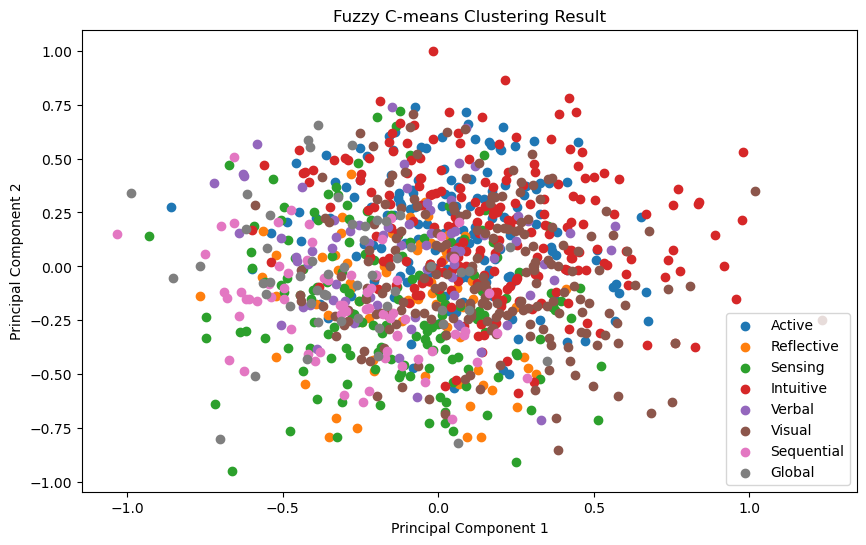

In [22]:
plt.figure(figsize=(10, 6))

cluster_labels = {0: 'Active', 1: 'Reflective', 2: 'Sensing', 3: 'Intuitive', 4: 'Verbal', 5: 'Visual', 6: 'Sequential', 7: 'Global'}

for cluster in range(8):  # Assuming 8 clusters
    cluster_points = clustered_data[clustered_data['Cluster'] == cluster]
    plt.scatter(cluster_points['PC1'], cluster_points['PC2'], label=f'{cluster_labels.get(cluster, f"{cluster}")}')
plt.title('Fuzzy C-means Clustering Result')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [23]:
print("Fuzzy Partition Coefficient (FPC):", fpc)

Fuzzy Partition Coefficient (FPC): 0.12500000003971498


In [24]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(data_transposed.T, cluster_membership, metric='euclidean')
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.012910037017024865


In [25]:
from sklearn.metrics import davies_bouldin_score
db_index = davies_bouldin_score(data_transposed.T, cluster_membership)
print("Davies-Bouldin Index:", db_index)

Davies-Bouldin Index: 4.182324409527764
